<a href="https://colab.research.google.com/github/Spin-Chemistry-Labs/radicalpy/blob/187-google-colab-tutorials/examples/tutorials/07_introduction_to_CIDNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Tutorial 8 - Introduction to CIDNP and NMR



&copy; Lewis M. Antill, 2025

This tutorial aims to introduced simple methods for simulating NMR and CIDNP spectra.

In [ ]:
!pip install radicalpy

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from radicalpy.experiments import cidnp, nmr

---

### Nuclear Magnetic Resonance

CIDNP spectrum is simply an NMR spectrum with enhanced intensities, it is straightforward to simulate. The starting point is the construction of a time-domain signal, which is given by the following,

$$
s(t) = \Sigma_k (K_k exp(i \Omega_k t) cos^{l_k - 1} (\pi J_k t )) \times exp(-t/T_2)
$$

where $K_k$ is the number of nuclear spins contributing to the kth multiplet, which occurs at an offset of $\Omega_k$, with a scalar coupling of $J_k$ and a multiplicity of $l_k$. $T_2$ is the spin-spin relaxation time and governs the linewidth ($\Delta \nu_{FWHM} = \frac{1}{\pi T_2}$). We assume that the weak coupling scheme applies, which is a reasonable approximation at high field.

The NMR spectrum is then given by he Fourier transform,

$$
s(t) = \int_0^{\inf} s(t) exp(i \omega t) dt
$$

As is convention, the real part is displayed.

The following example is for the tyrosine molecule.

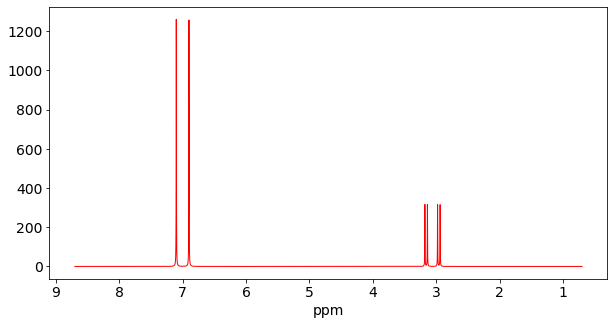

In [8]:
MULTIPLETS = [
    (2.0, 800.0, 2, 0),  # 2 doublets @ 800 Hz
    (2.0, 900.0, 2, 0),  # 2 doublets @ 900 Hz
    (1.0, 2870.0, 2, 20),  # doublet @ 2870 Hz, J=20 Hz
    (1.0, 2770.0, 2, 20),  # doublet @ 2770 Hz, J=20 Hz
]
SW_HZ = 4000.0  # spectral width (Hz)
NP = 8000  # acquired points
N_FFT = 16000  # zero-filled FFT length
TRANS_MHZ = 500.0  # transmitter frequency (MHz)
CARRIER_PPM = 4.7  # carrier position (ppm)
LINEWIDTH_HZ = 2.0  # Lorentzian linewidth (Hz)
SCALE = 1.0  # final y-scale

ppm, spectrum = nmr(
    multiplets=MULTIPLETS,
    spectral_width=SW_HZ,
    number_of_points=NP,
    fft_number=N_FFT,
    transmitter_frequency=TRANS_MHZ,
    carrier_position=CARRIER_PPM,
    linewidth=LINEWIDTH_HZ,
    scale=SCALE,
)

plt.plot(ppm, spectrum.real, "r", linewidth=1)
plt.gca().invert_xaxis()
plt.xlabel("ppm", size=14)
plt.tick_params(labelsize=14)
plt.gcf().set_size_inches(10, 5)
plt.show()

---

### Chemically Induced Dynamic Nuclear Polarisation

As the CIDNP spectra are just NMR spectra with enhanced intensities, this is accounted for by replacing the number of nuclei contributing to the multiplet, with the CIDNP intensity obtained from the field dependence calculations. This is a valid approach since to a first approximation the observed CIDNP intensity is proportional to the polarisation generated.

For NMR spectra,
$$
I_k \propto K_k
$$

For CIDNP spectra,
$$
I_k \propto P_k^R
$$

Where $P_k^R$ is a follows,

$$
P_k^R = \frac{1}{2^{N-1}3^M} \Sigma_{i\neq k, j}(P^X(\omega^+_{ST_0; i,j,k}) - P^X(\omega^-_{ST_0; i,j,k}))
$$

Where,

$$
P^X(\omega^{\pm}_{ST_0; i,j,k}) = \Delta g \frac{\mu_B B_0}{\hbar} \pm \frac{1}{2}a_k + \Sigma_{m_{li} = -I_i}^{+I_i} m_{Ii}a_{i1} 
- \Sigma_{m_{lj} = -I_j}^{+I_j} m_{Ij}a_{j1} m_{Ij}a_{j2}
$$

N is the number of spin-$\frac{1}{2}$ nuclei and $M$ is the number of spin-1 nuclei in the calculation. $\Delta g$ is defined as $g_1 - g_2$. This calculates the nuclear polarisation of a particular spin-$\frac{1}{2}$ nucleus $k$ situated on radical one, in the presence of all other nuclei in the radical pair, in all possible configurations of nuclear spin states. Weak coupling between the nuclear spins is assumed.

Here we consider the exponential model (model "a") and the more realistic diffusion based model (model "c") and its simplified form (model "b"), which were proposed by Adrian, for re-encounter kinetics.

The following example contains a radical pair with a tyrosine donor and an FMN acceptor molecule.

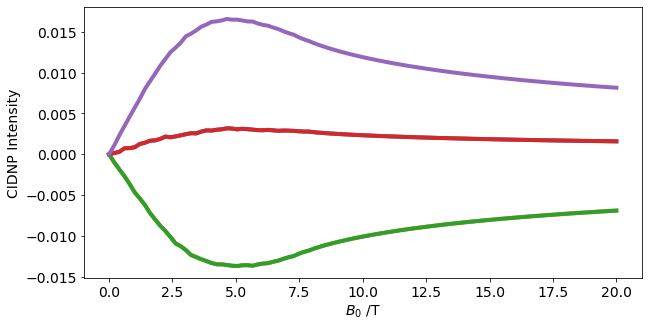

In [18]:
Bmax=20.0
dB=100
deltag = 2.0041 - 2.0036
Bs = np.linspace(0.0, Bmax, dB)
ks = 5e8  # s^-1
alpha = 1.5
model = "c"
donor_hfcs_spinhalf = [0.15, -0.65, -0.65, 0.15, 0.77]
acceptor_hfcs_spinhalf = [0.390, -0.769, -0.17, 0.24]
donor_hfcs_spin1 = []
acceptor_hfcs_spin1 = []

for i in range(1, 6):
    B0, p = cidnp(
        B0=Bs,
        deltag=deltag,
        cidnp_model=model,
        ks=ks,
        alpha=alpha,
        nucleus_of_interest=i,
        donor_hfc_spinhalf=donor_hfcs_spinhalf,
        acceptor_hfc_spinhalf=acceptor_hfcs_spinhalf,
        donor_hfc_spin1=donor_hfcs_spin1,
        acceptor_hfc_spin1=acceptor_hfcs_spin1,
    )
    plt.plot(B0, p, linewidth=4)

plt.xlabel("$B_0$ /T", size=14)
plt.ylabel("CIDNP Intensity", size=14)
plt.tick_params(labelsize=14)
plt.gcf().set_size_inches(10, 5)
plt.show()

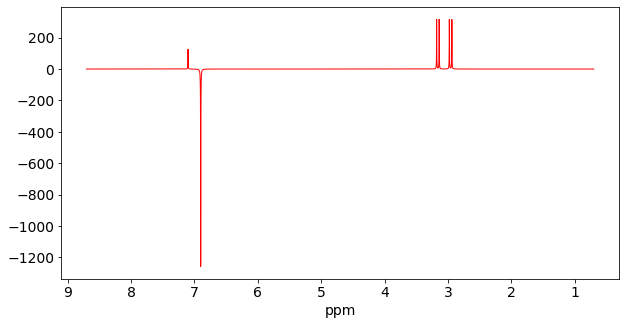

In [15]:
MULTIPLETS = [
    (0.2, 800.0, 2, 0),  # 2 doublets @ 800 Hz
    (-2.0, 900.0, 2, 0),  # 2 doublets @ 900 Hz
    (1.0, 2870.0, 2, 20),  # doublet @ 2870 Hz, J=20 Hz
    (1.0, 2770.0, 2, 20),  # doublet @ 2770 Hz, J=20 Hz
]
SW_HZ = 4000.0  # spectral width (Hz)
NP = 8000  # acquired points
N_FFT = 16000  # zero-filled FFT length
TRANS_MHZ = 500.0  # transmitter frequency (MHz)
CARRIER_PPM = 4.7  # carrier position (ppm)
LINEWIDTH_HZ = 2.0  # Lorentzian linewidth (Hz)
SCALE = 1.0  # final y-scale

ppm, spectrum = nmr(
    multiplets=MULTIPLETS,
    spectral_width=SW_HZ,
    number_of_points=NP,
    fft_number=N_FFT,
    transmitter_frequency=TRANS_MHZ,
    carrier_position=CARRIER_PPM,
    linewidth=LINEWIDTH_HZ,
    scale=SCALE,
)

plt.plot(ppm, spectrum.real, "r", linewidth=1)
plt.gca().invert_xaxis()
plt.xlabel("ppm", size=14)
plt.tick_params(labelsize=14)
plt.gcf().set_size_inches(10, 5)
plt.show()